**Step 1:** *Importing the Libraries*

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score, make_scorer, precision_score, recall_score
import warnings, time
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

**Step 2:** *Reading and Analysing the Dataset*


In [2]:
df = pd.read_csv("../data/online-fraud-dataset.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
# drop isFlaggedFraud since its redundant
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [7]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: >

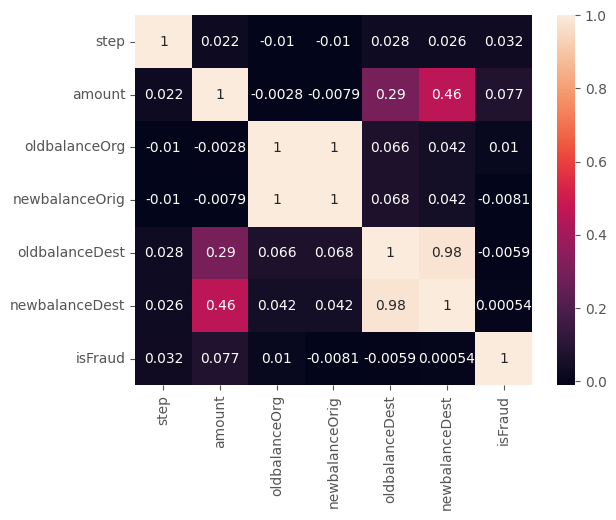

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Step 3 A:** *Univariate Analysis*

**a)** Step

<Axes: xlabel='step', ylabel='Count'>

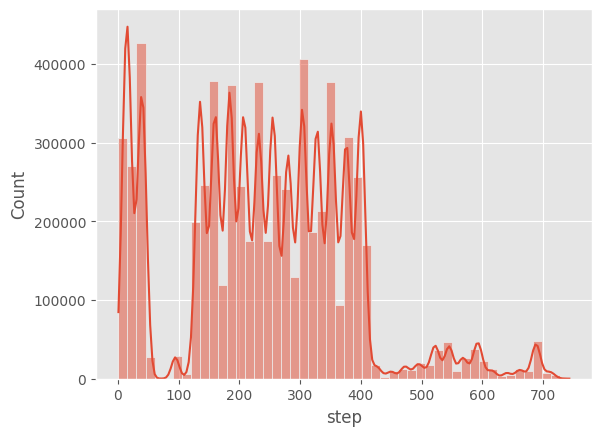

In [11]:
sns.histplot(data=df,x='step',bins=50,kde=True)

<Axes: xlabel='step'>

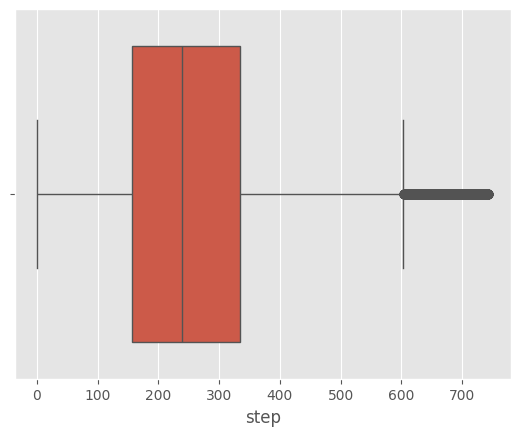

In [12]:
sns.boxplot(data=df,x='step')

**b)** Type

<Axes: xlabel='type', ylabel='count'>

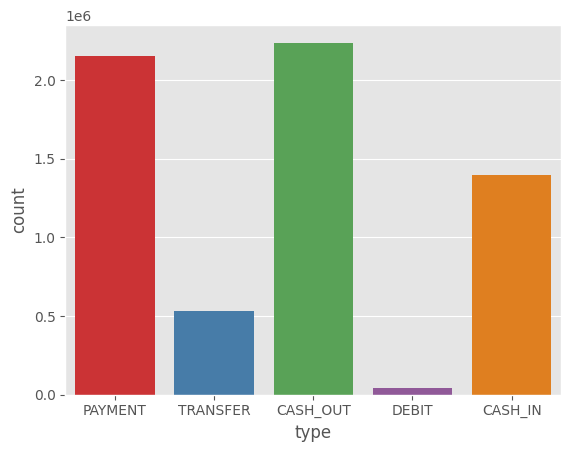

In [13]:
sns.countplot(data=df,x='type',palette='Set1')

In [14]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

**c)** Amount

<Axes: xlabel='amount', ylabel='Count'>

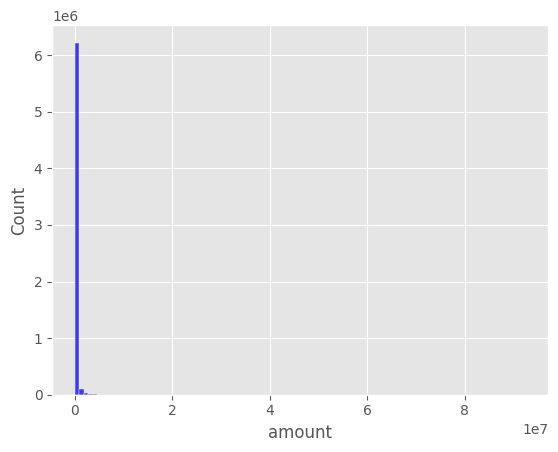

In [15]:
sns.histplot(data=df,x='amount',bins = 100, color='blue')

<Axes: xlabel='amount'>

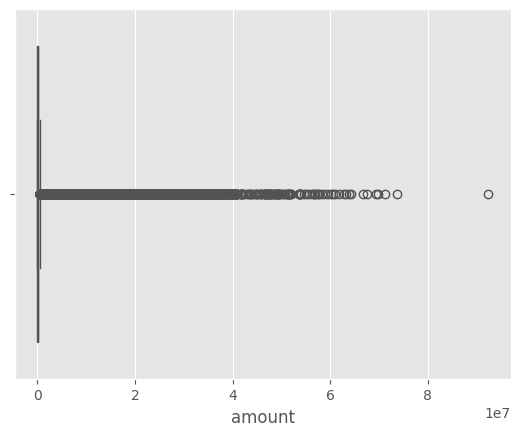

In [16]:
sns.boxplot(data=df,x='amount')

**d)** oldBalanceOrg

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

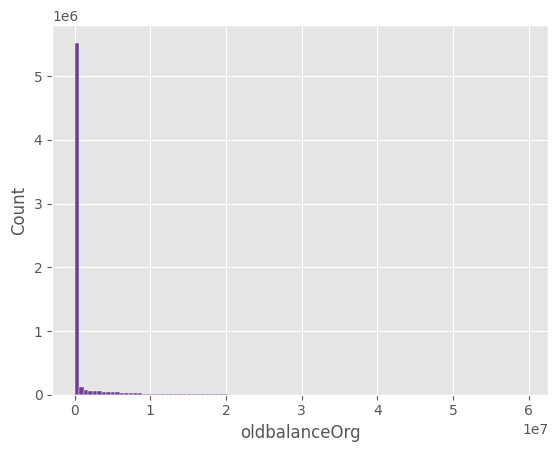

In [17]:
sns.histplot(data=df,x='oldbalanceOrg', bins = 100, color='indigo')

In [18]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M295304806       1
M33419717        1
M1940055334      1
M335107734       1
M1757317128      1
Name: count, Length: 2722362, dtype: int64

**e)** oldBalanceDest

<Axes: xlabel='oldbalanceDest'>

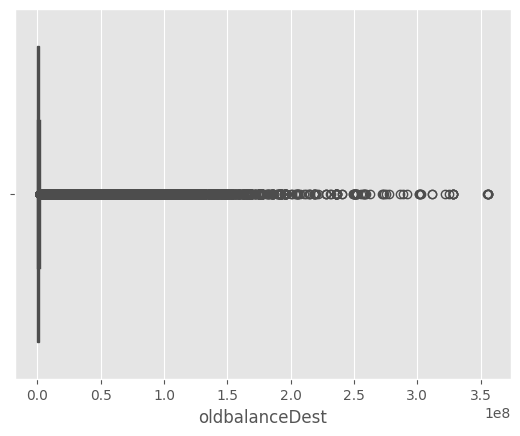

In [19]:
sns.boxplot(data=df,x='oldbalanceDest', color='cyan')

**f)** newBalanceDest

<Axes: xlabel='newbalanceDest'>

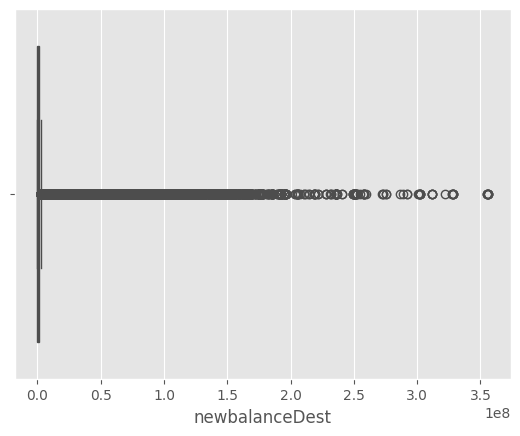

In [20]:
sns.boxplot(data=df, x='newbalanceDest',color='cyan')

<Axes: xlabel='isFraud', ylabel='count'>

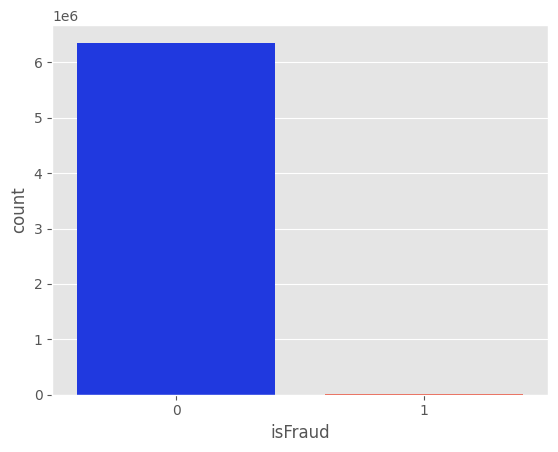

In [21]:
sns.countplot(data=df,x='isFraud', palette=['#0022ff','#ff4026'])

**Step 3 B:** *Bivariate Analysis*

In [22]:
df.loc[df['isFraud']==0,'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1,'isFraud'] = 'is Fraud'

In [23]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,is Fraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,is Fraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,is Fraud
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,is Fraud


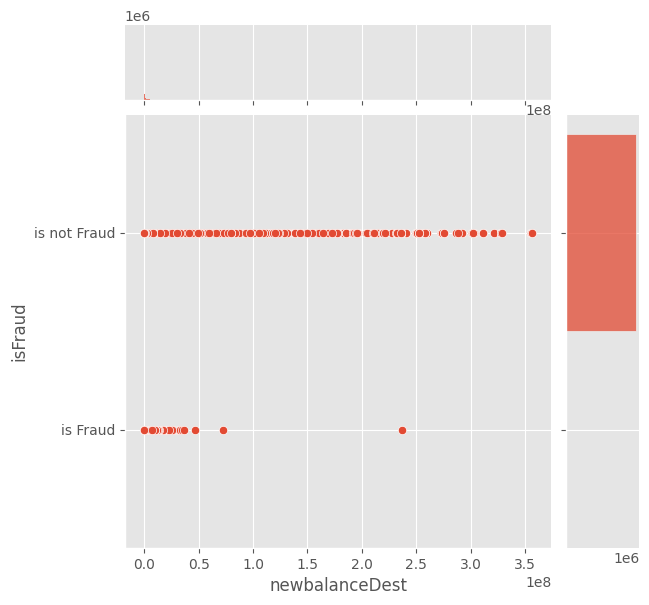

In [24]:
sns.jointplot(data=df, x="newbalanceDest", y="isFraud")

<Axes: xlabel='type', ylabel='count'>

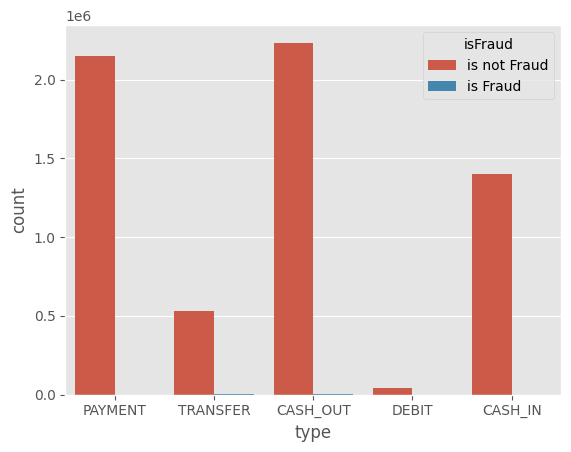

In [25]:
sns.countplot(data=df, x="type", hue="isFraud")

<Axes: xlabel='isFraud', ylabel='step'>

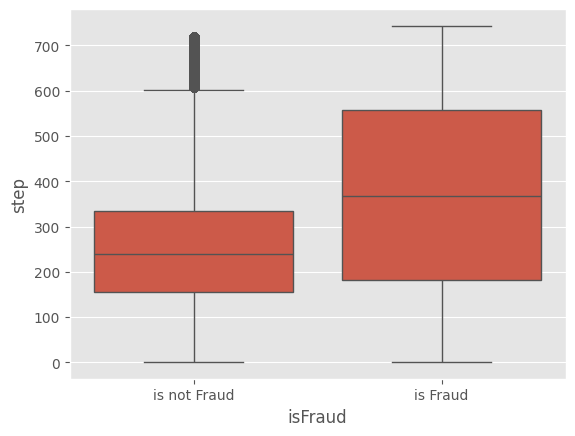

In [26]:
sns.boxplot(data=df, x="isFraud", y="step")

<Axes: xlabel='isFraud', ylabel='amount'>

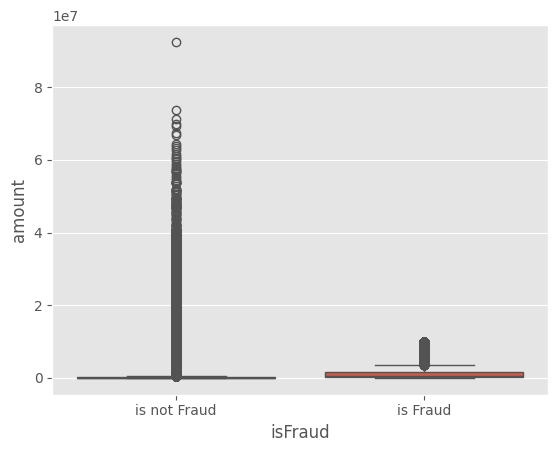

In [27]:
sns.boxplot(data=df, x="isFraud", y="amount")

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

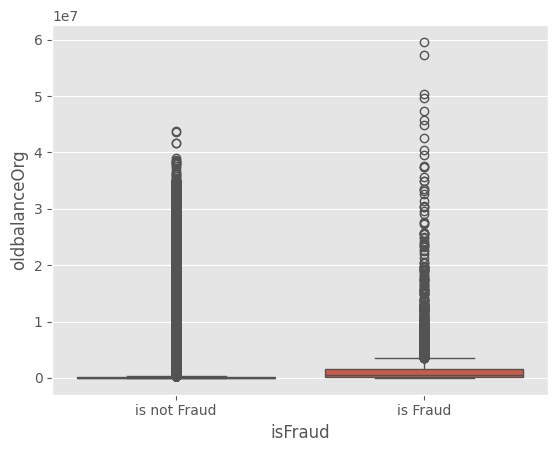

In [28]:
sns.boxplot(data=df, x="isFraud", y="oldbalanceOrg")

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

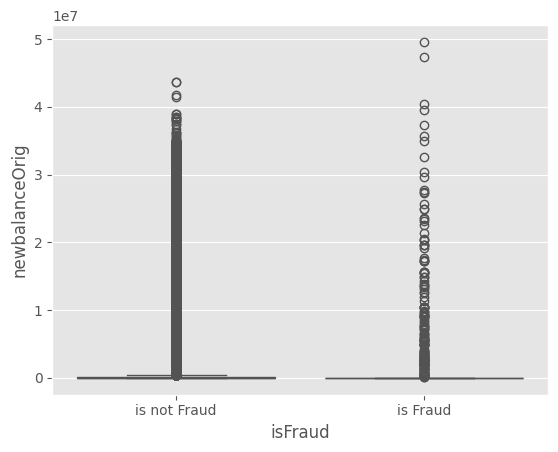

In [29]:
sns.boxplot(data=df, x="isFraud", y="newbalanceOrig")

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

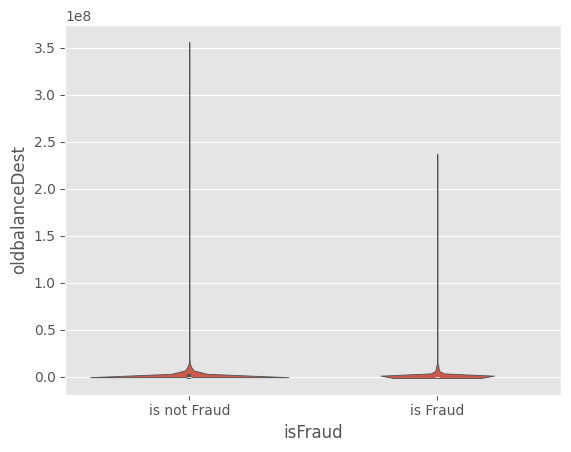

In [30]:
sns.violinplot(data=df, x="isFraud", y="oldbalanceDest")

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

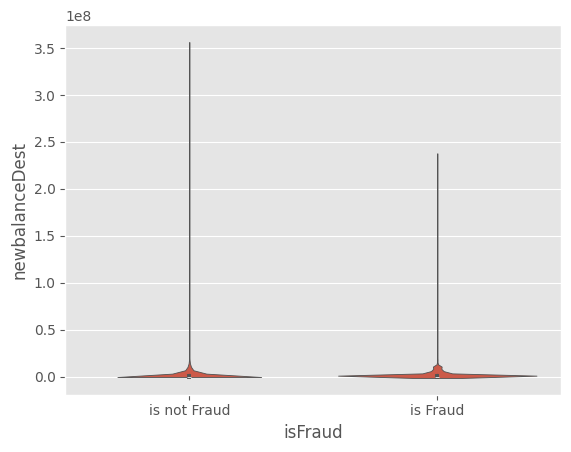

In [31]:
sns.violinplot(data=df, x="isFraud", y="newbalanceDest")

**Step 3 C:** *Descriptive Analysis*

In [32]:
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1677795071,NaN,NaN,C1286084959,NaN,NaN,is not Fraud
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,6354407
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,NaN
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,NaN
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,NaN


**Step 4:** *Data Pre-processing*

**a)** Handling NULL Values

In [33]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
dtypes: float64(5), int64(1), object(4)
memory usage: 485.4+ MB


**b)** Handling Outliers

<Axes: xlabel='amount'>

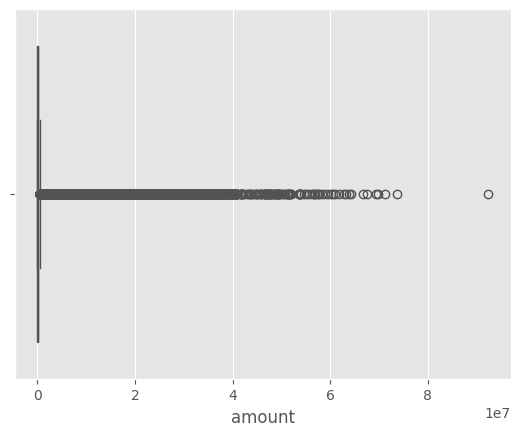

In [35]:
sns.boxplot(x=df['amount'])

In [36]:
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071


In [37]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)

IQR = q3 - q1

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print('q1', q1)
print('q3', q3)
print('IQR', IQR)
print('Upper Bound', upper_bound)
print('Lower Bound', lower_bound)

print('Skewed data', len(df[df['amount'] > upper_bound]))
print('Skewed data', len(df[df['amount'] < lower_bound]))

q1 13389.57
q3 208721.4775
IQR 195331.9075
Upper Bound 501719.33875
Lower Bound -279608.29125
Skewed data 338078
Skewed data 0


In [38]:
def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(feature, kde=True, bins=100)
    plt.subplot(1,2,2)
    stats.probplot(feature, dist="norm", plot=plt)

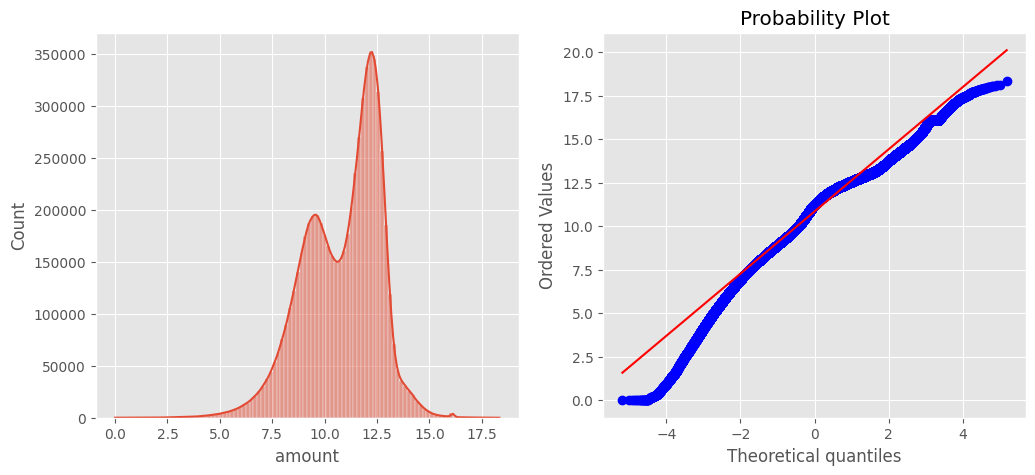

In [39]:
transformationPlot(np.log1p(df['amount']))

In [40]:
df['amount']=np.log1p(df['amount'])

**c)** Object Label Encoding

In [41]:
la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])
mapping = dict(zip(la.classes_, la.transform(la.classes_)))
print(mapping)

{'CASH_IN': np.int64(0), 'CASH_OUT': np.int64(1), 'DEBIT': np.int64(2), 'PAYMENT': np.int64(3), 'TRANSFER': np.int64(4)}


In [42]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

**d)** Seperating Features from Target

In [43]:
X = df.drop(['isFraud','nameOrig','nameDest'], axis=1)
Y = df['isFraud']

In [44]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194276,170136.00,160296.36,0.00,0.00
1,1,3,7.531166,21249.00,19384.72,0.00,0.00
2,1,4,5.204007,181.00,0.00,0.00,0.00
3,1,1,5.204007,181.00,0.00,21182.00,0.00
4,1,3,9.364703,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,12.735768,339682.13,0.00,0.00,339682.13
6362616,743,4,15.657870,6311409.28,0.00,0.00,0.00
6362617,743,1,15.657870,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,13.652996,850002.52,0.00,0.00,0.00


In [45]:
print(np.isinf(X).sum())

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64


In [46]:
Y

0          is not Fraud
1          is not Fraud
2              is Fraud
3              is Fraud
4          is not Fraud
               ...     
6362615        is Fraud
6362616        is Fraud
6362617        is Fraud
6362618        is Fraud
6362619        is Fraud
Name: isFraud, Length: 6362620, dtype: object

**e)** Splitting Data into Train and Test (70-30 split)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

In [48]:
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(1908786, 7)
(4453834, 7)
(1908786,)
(4453834,)


In [49]:
X_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3019524,233,3,9.654832,0.00,0.00,0.00,0.00
1012167,46,3,8.937762,90120.00,82506.86,0.00,0.00
5551834,383,4,13.550702,0.00,0.00,4528365.13,5295716.81
2081309,182,1,12.028630,1293445.15,1125964.33,0.00,167480.81
4457939,323,1,12.210753,104248.00,0.00,3242311.66,3443248.87
...,...,...,...,...,...,...,...
2249467,187,1,11.641256,4231.00,0.00,397758.64,511450.47
5157699,357,1,8.266925,20146.00,16254.04,253375.00,257266.97
2215104,186,0,11.287799,10152925.86,10232766.38,276175.87,196335.36
1484405,141,0,13.250942,1081784.28,1650388.77,2631796.49,2063191.99


In [50]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaNs in X_train and update Y_train accordingly
train_valid_idx = X_train.dropna().index
X_train = X_train.loc[train_valid_idx]
Y_train = Y_train.loc[train_valid_idx]

# Do the same for X_test and Y_test
test_valid_idx = X_test.dropna().index
X_test = X_test.loc[test_valid_idx]
Y_test = Y_test.loc[test_valid_idx]

**f)** Handling class imbalance

In [51]:
sm = SMOTEENN(random_state=42,n_jobs=-1)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print("Before Resampling:", Y_train.value_counts())
print("After Resampling:", Y_train_res.value_counts())

Before Resampling: isFraud
is not Fraud    4448040
is Fraud           5794
Name: count, dtype: int64
After Resampling: isFraud
is Fraud        4428125
is not Fraud    4396928
Name: count, dtype: int64


In [52]:
print("Y_train_res distribution:\n", Y_train_res.value_counts())

Y_train_res distribution:
 isFraud
is Fraud        4428125
is not Fraud    4396928
Name: count, dtype: int64


```-- Scaling for non-tree based models --```

In [53]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

**Step 5:** *Model Building*

```- Random Forest Classifier -```

In [54]:
rfc = RandomForestClassifier(
    n_estimators=50,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)
rfc.fit(X_train_res, Y_train_res)

Y_train_predict1 = rfc.predict(X_train_res)
train_accuracy = accuracy_score(Y_train_res, Y_train_predict1)
train_accuracy

0.9971823398681005

In [55]:
Y_test_predict1 = rfc.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_predict1)
test_accuracy

0.9936708462865926

In [56]:
pd.crosstab(Y_test, Y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,2379,40
is not Fraud,12041,1894326


In [57]:
print(classification_report(Y_test, Y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.16      0.98      0.28      2419
is not Fraud       1.00      0.99      1.00   1906367

    accuracy                           0.99   1908786
   macro avg       0.58      0.99      0.64   1908786
weighted avg       1.00      0.99      1.00   1908786



``` - Extra Trees Classifier - ```

In [58]:
etc = ExtraTreesClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1)
etc.fit(X_train_res,Y_train_res)

Y_train_predict2=etc.predict(X_train_res)
train_accuracy = accuracy_score(Y_train_res,Y_train_predict2)
train_accuracy

1.0

In [59]:
Y_test_predict2=etc.predict(X_test)
test_accuracy=accuracy_score(Y_test,Y_test_predict2)
test_accuracy

0.9988065712971491

In [60]:
pd.crosstab(Y_test,Y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,2313,106
is not Fraud,2172,1904195


In [61]:
print(classification_report(Y_test,Y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.52      0.96      0.67      2419
is not Fraud       1.00      1.00      1.00   1906367

    accuracy                           1.00   1908786
   macro avg       0.76      0.98      0.83   1908786
weighted avg       1.00      1.00      1.00   1908786



``` -- XGBoost Classifier -- ```

In [62]:
la = LabelEncoder()
Y_train1 = la.fit_transform(Y_train_res)
Y_test1 = la.transform(Y_test)

In [ ]:
xgb1 = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42
)
xgb1.fit(X_train_res, Y_train1)

Y_train_predict3 = xgb1.predict(X_train_res)
train_accuracy = accuracy_score(Y_train1, Y_train_predict3)
train_accuracy

0.9991160393031068

In [118]:
Y_test_predict3 = xgb1.predict(X_test)
test_accuracy = accuracy_score(Y_test1, Y_test_predict3)
test_accuracy

0.9975597054882004

In [119]:
pd.crosstab(Y_test1,Y_test_predict3)

col_0,0,1
row_0,,
0,2397,22
1,4636,1901731


In [120]:
print(classification_report(Y_test1, Y_test_predict3))

              precision    recall  f1-score   support

           0       0.34      0.99      0.51      2419
           1       1.00      1.00      1.00   1906367

    accuracy                           1.00   1908786
   macro avg       0.67      0.99      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



``` -- Linear SVC Classifier -- ```

In [67]:
svc = LinearSVC(
    C=1.0,
    penalty='l2',
    loss='squared_hinge', 
    max_iter=5000,
    random_state=42,
    dual=False)
svc.fit(X_train_res_scaled,Y_train_res)

Y_train_predict4=svc.predict(X_train_res_scaled)
train_accuracy=accuracy_score(Y_train_res,Y_train_predict4)
train_accuracy

0.9184802629513953

In [68]:
Y_test_predict4=svc.predict(X_test_scaled)
test_accuracy=accuracy_score(Y_test,Y_test_predict4)
test_accuracy

0.9655157780914152

In [69]:
pd.crosstab(Y_test,Y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,2087,332
is not Fraud,65491,1840876


In [70]:
print(classification_report(Y_test,Y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       0.03      0.86      0.06      2419
is not Fraud       1.00      0.97      0.98   1906367

    accuracy                           0.97   1908786
   macro avg       0.52      0.91      0.52   1908786
weighted avg       1.00      0.97      0.98   1908786



``` -- Decision Tree Classifier -- ```

In [71]:
dtc= DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
dtc.fit(X_train_res, Y_train_res)

Y_train_predict5=dtc.predict(X_train_res)
train_accuracy=accuracy_score(Y_train_res,Y_train_predict5)
train_accuracy

0.9970694793561014

In [72]:
Y_test_predict5= dtc.predict(X_test)
test_accuracy=accuracy_score(Y_test,Y_test_predict5)
test_accuracy

0.994012424651061

In [73]:
pd.crosstab(Y_test,Y_test_predict5)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,2401,18
is not Fraud,11411,1894956


In [74]:
print(classification_report(Y_test, Y_test_predict5))

              precision    recall  f1-score   support

    is Fraud       0.17      0.99      0.30      2419
is not Fraud       1.00      0.99      1.00   1906367

    accuracy                           0.99   1908786
   macro avg       0.59      0.99      0.65   1908786
weighted avg       1.00      0.99      1.00   1908786



``` Comparing all the models: ```

In [75]:
def compareModel():
    print("train accuracy for rfc", accuracy_score(Y_train_res,Y_train_predict1))
    print("test accuracy for rfc", accuracy_score(Y_test,Y_test_predict1))
    print("train accuracy for etc", accuracy_score(Y_train_res,Y_train_predict2))
    print("test accuracy for etc", accuracy_score(Y_test,Y_test_predict2))
    print("train accuracy for xgb1", accuracy_score(Y_train1,Y_train_predict3))
    print("test accuracy for xgb1", accuracy_score(Y_test1,Y_test_predict3))
    print("train accuracy for svc", accuracy_score(Y_train_res,Y_train_predict4))
    print("test accuracy for svc", accuracy_score(Y_test,Y_test_predict4))
    print("train accuracy for dtc", accuracy_score(Y_train_res,Y_train_predict5))
    print("test accuracy for dtc", accuracy_score(Y_test,Y_test_predict5))

In [76]:
compareModel()

train accuracy for rfc 0.9971823398681005
test accuracy for rfc 0.9936708462865926
train accuracy for etc 1.0
test accuracy for etc 0.9988065712971491
train accuracy for xgb1 0.9204488630266583
test accuracy for xgb1 0.9997139543144177
train accuracy for svc 0.9184802629513953
test accuracy for svc 0.9655157780914152
train accuracy for dtc 0.9970694793561014
test accuracy for dtc 0.994012424651061


**Step 6:** *Hyper Parameter Tuning Best Model*

In [84]:
# Create a new LabelEncoder
le = LabelEncoder()

# Fit on the original Y_train and transform both Y_train and Y_test
Y_train_encoded = le.fit_transform(Y_train)
Y_test_encoded = le.transform(Y_test)

# Find out which number corresponds to 'is Fraud' (it will likely be 0)
fraud_label_numeric = le.transform(['is Fraud'])[0]

print(f"LabelEncoder mapping: 'is Fraud' is now {fraud_label_numeric}")
print(f"Original Y_train shape: {Y_train.shape}")
print(f"Encoded Y_train_encoded shape: {Y_train_encoded.shape}")

LabelEncoder mapping: 'is Fraud' is now 0
Original Y_train shape: (4453834,)
Encoded Y_train_encoded shape: (4453834,)


In [85]:
# Define the steps for the pipeline
xgb_pipeline = Pipeline([
    ('smote', SMOTEENN(random_state=42, n_jobs=-1)),
    ('model', xgb.XGBClassifier(
        device='cuda',
        tree_method='hist',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ))
])

In [86]:
# 2. Define the parameter grid for XGBoost
param_grid = {
    'model__n_estimators': [100, 200, 400],
    'model__max_depth': [6, 10, 15],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0]
}

In [87]:
# scorer
f1_scorer = make_scorer(f1_score, pos_label=fraud_label_numeric, average='binary')

# Using RandomizedSearchCV

In [88]:
# Set up the RandomizedSearchCV
rf_random_pipeline = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1,
    scoring=f1_scorer
)

In [89]:
# Start the timer
print("Starting Hyperparameter Tuning...")
start_time = time.time()

Starting Hyperparameter Tuning...


In [90]:
rf_random_pipeline.fit(X_train, Y_train_encoded) 
print(f"--- Tuning finished in {(time.time() - start_time) / 60:.2f} minutes ---")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=15, model__n_estimators=400, model__subsample=0.7; total time= 1.7min
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=15, model__n_estimators=400, model__subsample=0.7; total time= 2.0min
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=15, model__n_estimators=400, model__subsample=0.7; total time= 2.0min
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=6, model__n_estimators=400, model__subsample=0.7; total time= 1.5min
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=6, model__n_estimators=400, model__subsample=0.7; total time= 1.7min
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=6, model__n_estimators=400, model__subsample=0.7; total time= 1.8min
[CV] END model__colsample_bytr

In [122]:
# --- Evaluate the NEW model from the pipeline search ---
print("\nBest Parameters Found from Pipeline Search:")
print(rf_random_pipeline.best_params_)

print(f"\nBest F1-Score from search (this is a realistic score): {rf_random_pipeline.best_score_:.4f}") 

# Get the best model from the pipeline
best_xgb_pipeline = rf_random_pipeline.best_estimator_

# Predict on the original, unbalanced X_test
Y_test_predict_tuned = best_xgb_pipeline.predict(X_test)

# --- Compare the reports ---
print("\n--- Test Set Evaluation (New Tuned XGBoost Model) ---")
print(classification_report(Y_test1, Y_test_predict_tuned, target_names=le.classes_))


print("\n--- Test Set Evaluation (Old Untuned XGBoost Model) ---")
print(classification_report(Y_test1, Y_test_predict3, target_names=le.classes_))


Best Parameters Found from Pipeline Search:
{'model__subsample': 1.0, 'model__n_estimators': 400, 'model__max_depth': 10, 'model__learning_rate': 0.2, 'model__colsample_bytree': 0.8}

Best F1-Score from search (this is a realistic score): 0.7010

--- Test Set Evaluation (New Tuned XGBoost Model) ---
              precision    recall  f1-score   support

    is Fraud       0.54      0.98      0.70      2419
is not Fraud       1.00      1.00      1.00   1906367

    accuracy                           1.00   1908786
   macro avg       0.77      0.99      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786


--- Test Set Evaluation (Old Untuned XGBoost Model) ---
              precision    recall  f1-score   support

    is Fraud       0.34      0.99      0.51      2419
is not Fraud       1.00      1.00      1.00   1906367

    accuracy                           1.00   1908786
   macro avg       0.67      0.99      0.75   1908786
weighted avg       1.00      1.00      1.0

# Using GridSearchCV

In [123]:
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_test_encoded = le.transform(Y_test)

fraud_label_numeric = le.transform(['is Fraud'])[0]
print(f"LabelEncoder mapping: 'is Fraud' is now {fraud_label_numeric}")

LabelEncoder mapping: 'is Fraud' is now 0


In [124]:
print("Starting SMOTEENN on the training set (this may take a while)...")
start_time = time.time()
sm = SMOTEENN(random_state=42, n_jobs=-1)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train_encoded)
print(f"--- Resampling finished in {(time.time() - start_time) / 60:.2f} minutes ---")

Starting SMOTEENN on the training set (this may take a while)...
--- Resampling finished in 3.01 minutes ---


In [125]:
xgb_model = xgb.XGBClassifier(
    tree_method='hist',
    device='cuda',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [126]:
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.2],
    'scale_pos_weight': [400, 600, 774, 800]
}

In [127]:
scoring = {
    'f1': make_scorer(f1_score, pos_label=fraud_label_numeric, average='binary'),
    'precision': make_scorer(precision_score, pos_label=fraud_label_numeric, average='binary'),
    'recall': make_scorer(recall_score, pos_label=fraud_label_numeric, average='binary')
}

In [128]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=1,
    scoring=scoring,
    refit='precision'
)

In [129]:
print("Starting GridSearchCV on RESAMPLED data...")
start_time = time.time()
grid_search.fit(X_train_res, Y_train_res)
print(f"--- GridSearch finished in {(time.time() - start_time) / 60:.2f} minutes ---")

Starting GridSearchCV on RESAMPLED data...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=400; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=400; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=400; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=600; total time=   3.8s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=600; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=600; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=774; total time=   3.8s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=774; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, scale_pos_weight=774; total time=   

In [131]:
pd.set_option('display.max_colwidth', None)

print("\n--- All Model Results from GridSearch (on synthetic data) ---")
print("NOTE: These scores are INFLATED because they are on synthetic data.")
print("Look for the best *balance* (e.g., high f1 and high precision).\n")

results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values(by='mean_test_f1', ascending=False)

print(results_df[[
    'params',
    'mean_test_f1',
    'mean_test_precision',
    'mean_test_recall'
]])

print("\nBest Parameters (based *only* on F1) Found from Search:")
print(grid_search.best_params_)
print(f"\nBest F1-Score from search (INFLATED): {grid_search.best_score_:.4f}")

best_xgb_grid = grid_search.best_estimator_

Y_test_predict_grid = best_xgb_grid.predict(X_test)

print("\n--- Test Set Evaluation (New GridSearch-Tuned Model) ---")
print(classification_report(Y_test_encoded, Y_test_predict_grid, target_names=le.classes_))

print("\n--- Test Set Evaluation (Old Untuned XGBoost Model from Cell 66) ---")
print(classification_report(Y_test1, Y_test_predict3, target_names=le.classes_))


--- All Model Results from GridSearch (on synthetic data) ---
NOTE: These scores are INFLATED because they are on synthetic data.
Look for the best *balance* (e.g., high f1 and high precision).

                                                                                   params  \
68  {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 400, 'scale_pos_weight': 400}   
70  {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 400, 'scale_pos_weight': 774}   
71  {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 400, 'scale_pos_weight': 800}   
69  {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 400, 'scale_pos_weight': 600}   
32  {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 400, 'scale_pos_weight': 400}   
..                                                                                    ...   
7    {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 800}   
0    {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 

## Using Best Values from GridSearchCV

In [134]:
# --- (NEW) Manually Build the Best Balanced Model ---

print("--- Building the Best *Balanced* Model from GridSearch ---")

best_balanced_params = {
    'learning_rate': 0.1, 
    'max_depth': 5,
    'n_estimators': 100,
    'scale_pos_weight': 800
}

# Create a new XGBClassifier with these parameters
xgb_best_balanced = xgb.XGBClassifier(
    tree_method='hist',
    device='cuda',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    **best_balanced_params
)

print("Training the new balanced model on resampled data...")
# Fit it on the resampled data (from Block 1)
xgb_best_balanced.fit(X_train_res, Y_train_res)

# --- Evaluate this new model on the REAL test set ---
Y_test_predict_balanced = xgb_best_balanced.predict(X_test)

print("\n--- Test Set Evaluation (New *BALANCED* Tuned Model) ---")
print(classification_report(Y_test_encoded, Y_test_predict_balanced, target_names=le.classes_))

print("\n--- Test Set Evaluation (Old Untuned XGBoost Model) ---")
print(classification_report(Y_test1, Y_test_predict3, target_names=le.classes_))

--- Building the Best *Balanced* Model from GridSearch ---
Training the new balanced model on resampled data...

--- Test Set Evaluation (New *BALANCED* Tuned Model) ---
              precision    recall  f1-score   support

    is Fraud       0.97      0.79      0.87      2419
is not Fraud       1.00      1.00      1.00   1906367

    accuracy                           1.00   1908786
   macro avg       0.98      0.90      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786


--- Test Set Evaluation (Old Untuned XGBoost Model) ---
              precision    recall  f1-score   support

    is Fraud       0.34      0.99      0.51      2419
is not Fraud       1.00      1.00      1.00   1906367

    accuracy                           1.00   1908786
   macro avg       0.67      0.99      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
# Manually Tuning we can get better scores by trying values around best found ones
xgb1 = xgb.XGBClassifier(
    scale_pos_weight=774,
    eval_metric='logloss',
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb1.fit(X_train_res, Y_train1)

Y_train_predict_manual = xgb1.predict(X_train_res)
train_accuracy = accuracy_score(Y_train1, Y_train_predict_manual)
train_accuracy

0.9463200957546657

In [136]:
Y_test_predict_manual = xgb1.predict(X_test)
test_accuracy = accuracy_score(Y_test1, Y_test_predict_manual)
test_accuracy

0.9997422445470576

In [137]:
pd.crosstab(Y_test1,Y_test_predict_manual)

col_0,0,1
row_0,,
0,2073,346
1,146,1906221


In [138]:
print(classification_report(Y_test1, Y_test_predict_manual))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2419
           1       1.00      1.00      1.00   1906367

    accuracy                           1.00   1908786
   macro avg       0.97      0.93      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786

